# K-MEANS CLUSTERING

## MallCustomers CaseStudy

The objective of this casestudy is to segment the clients into different groups visiting the mall based on two metrics i.e the annual income and the spending score of these clients using Clustering model techniques like K-Means Clustering

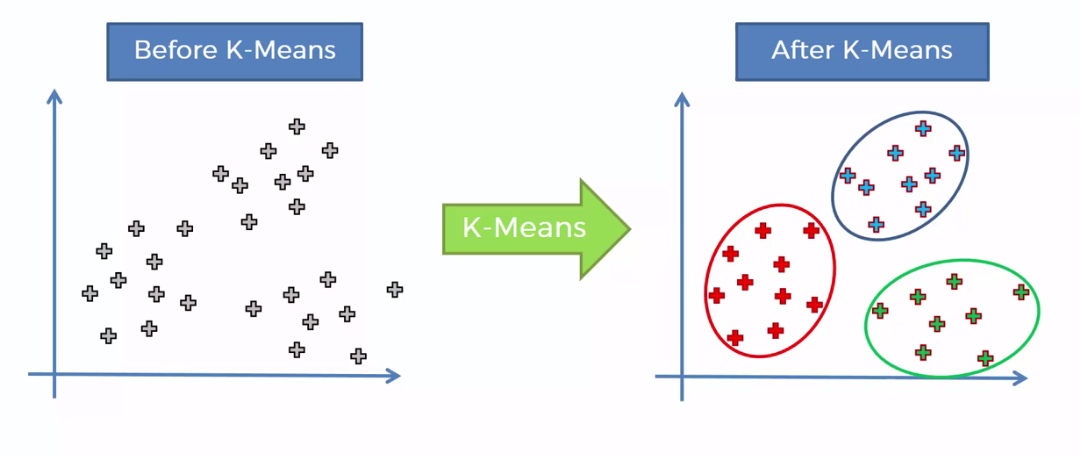

### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
os.chdir(r'G:\Ivy Pro Data Science, AI and Machine L\PYTHON\09CLUSTERING\03Case_2')
path_data = os.getcwd()

### Import data

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Basic EDA

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Now we will check the descriptive statistics of our numerical features
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# drop CustomerID column because it is irrelevant for analysis
df.drop(["CustomerID"], axis = 1, inplace=True)

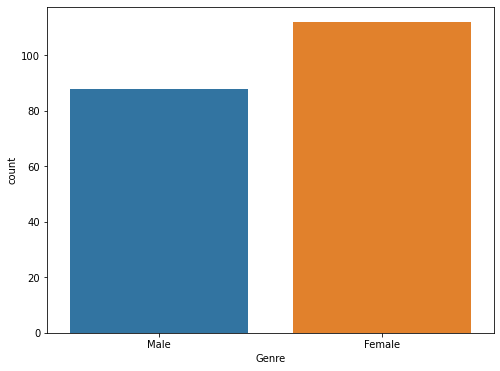

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x="Genre", data=df)
plt.show()

In [12]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

### Checking For Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2ae0676f040>,
 'caps': [<matplotlib.lines.Line2D at 0x2ae0676f700>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ae06747ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x2ae0676fdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ae0677a100>],
 'means': []}

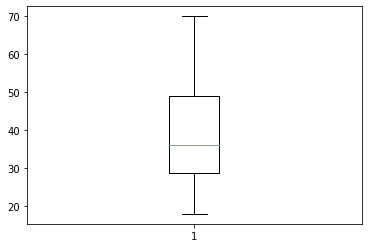

In [13]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2ae067d12b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ae067d1970>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ae067d1100>],
 'medians': [<matplotlib.lines.Line2D at 0x2ae067db070>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ae067db370>],
 'means': []}

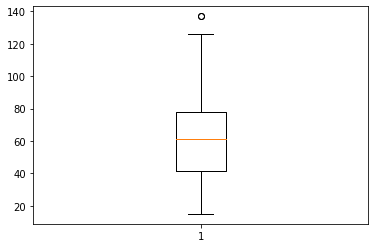

In [14]:
plt.boxplot(df['Annual Income (k$)'])

In [15]:
df['Annual Income (k$)']= np.where(df['Annual Income (k$)']>125,125,df['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2ae0682e730>,
 'caps': [<matplotlib.lines.Line2D at 0x2ae0682edf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ae0682e3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2ae068394f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ae068397f0>],
 'means': []}

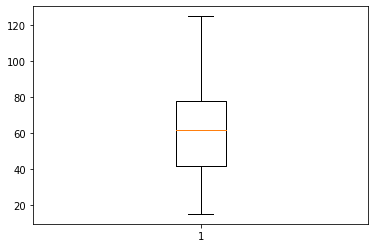

In [16]:
plt.boxplot(df['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2ae0688b4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ae0688bbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ae0688b190>],
 'medians': [<matplotlib.lines.Line2D at 0x2ae068952e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ae068955e0>],
 'means': []}

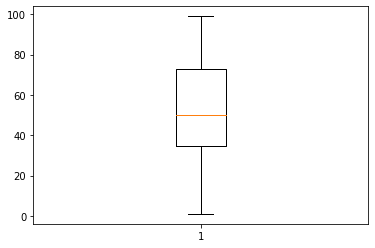

In [17]:
plt.boxplot(df['Spending Score (1-100)'])

In [18]:
# No Outliers found now

In [19]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## K-Means Clustering

In [20]:
X = df.iloc[: , [2,3]].values

In [21]:
# Using the Elbow method to find the optimal number of clusters
# Within Cluster Sum of Squares
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++' , max_iter=300 , n_init=10 , random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [22]:
wcss

[266337.02,
 178706.65050505055,
 104061.5923603568,
 71393.00833773398,
 42186.94870190196,
 35561.60026977853,
 29102.320843649097,
 23871.0343103969,
 20675.4856090982,
 18533.983606248825]

### Graph for K value using Elbow Method

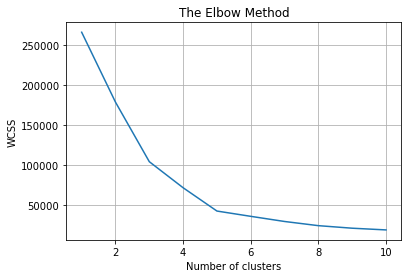

In [23]:
plt.plot(range(1,11),wcss)
plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

When we use elbow method in the above we may say 5 will be our number of cluster. Let's use K-Means and see how our plot will look like.

In [24]:
# Fitting the k = 5
kmeans = KMeans(n_clusters=5) 
kmeans.fit(X)

KMeans(n_clusters=5)

In [25]:
#prediction for kmeans clustering
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

## Visualising the clusters

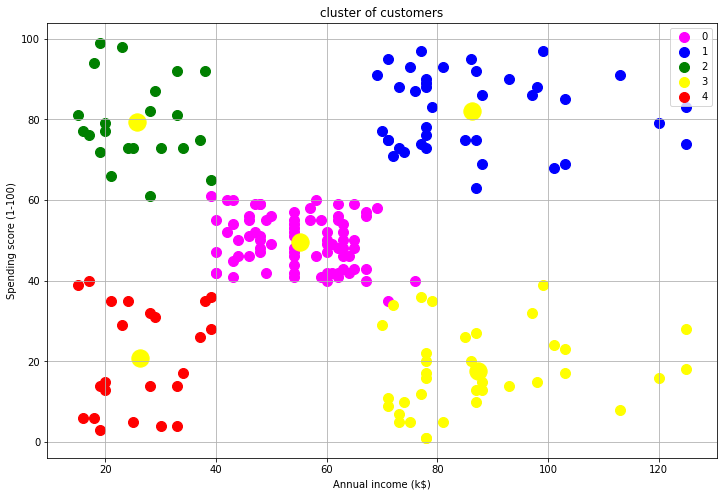

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_kmeans==0 , 0],X[y_kmeans==0 , 1] , s=100 , c='magenta' , label=0)
plt.scatter(X[y_kmeans==1 , 0],X[y_kmeans==1 , 1] , s=100 , c='blue' , label=1)
plt.scatter(X[y_kmeans==2 , 0],X[y_kmeans==2 , 1] , s=100 , c='green' , label=2)  
plt.scatter(X[y_kmeans==3 , 0],X[y_kmeans==3 , 1] , s=100 , c='yellow' , label=3)
plt.scatter(X[y_kmeans==4 , 0],X[y_kmeans==4 , 1] , s=100 , c='red' , label=4)
plt.scatter(kmeans.cluster_centers_[: , 0],kmeans.cluster_centers_[:,1] , s=300 , c='yellow')
plt.grid()
plt.title('cluster of customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

## INSIGHTS

========================================================================================================
* We have 5 type of customer and we grouped them on the basis of their Spending Score and Annual Income.


* We have customer in the cluster 3 (Yellow) have the lowest Annual Income as well as the Spending Score. In this case the target are these type of customers, so it can increase more revenue of the malls.


* We have customer in the cluster 4 (Red) have the highest Annual Income as well as the Spending Score.

========================================================================================================